In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rides = pd.read_csv("cab_rides.csv")
rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [3]:
weather = pd.read_csv("weather.csv")
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


## Data Preprocessing

In [4]:
rides.isna().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [5]:
weather.isna().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [6]:
rides = rides.dropna(axis = 0).reset_index(drop = True)
rides

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
637971,1.00,Uber,1543708385534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
637972,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
637973,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
637974,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [7]:
weather = weather.fillna(0)
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


## EDA

In [8]:
# display basic info about cab_rides.csv
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          637976 non-null  float64
 1   cab_type          637976 non-null  object 
 2   time_stamp        637976 non-null  int64  
 3   destination       637976 non-null  object 
 4   source            637976 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  637976 non-null  float64
 7   id                637976 non-null  object 
 8   product_id        637976 non-null  object 
 9   name              637976 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 48.7+ MB


In [9]:
# display basic info about weather.csv
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        6276 non-null   float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [10]:
# summary statistics of cab_rides.csv
rides.describe()

,distance,time_stamp,price,surge_multiplier
count,637976.000000,6.379760e+05,637976.000000,637976.000000
mean,2.189261,1.544046e+12,16.545125,1.015068
std,1.135413,6.892028e+08,9.324359,0.095422
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.270000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.930000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [11]:
# summary statistics of weather.csv
weather.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,6276.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.008212,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.043021,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000000,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.000000,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.000000,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.000000,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


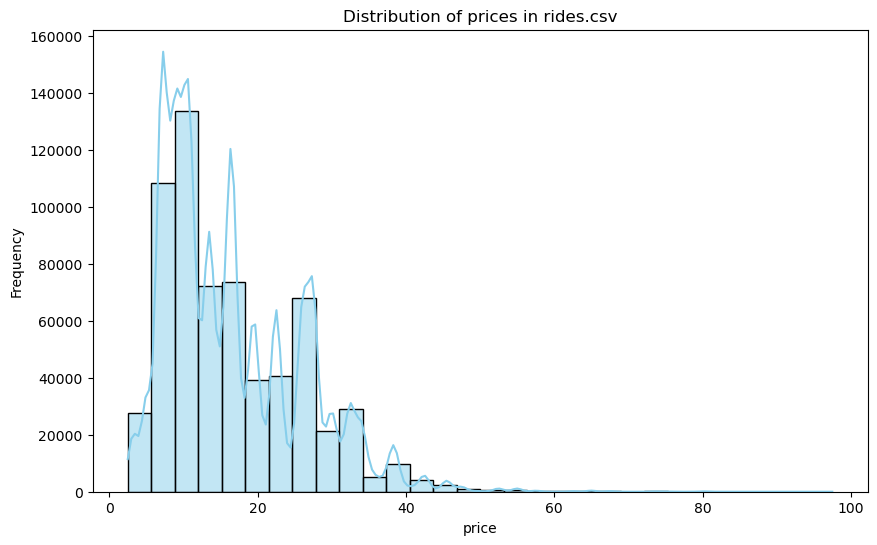

In [12]:
plt.figure(figsize = (10, 6))
sns.histplot(rides['price'], bins = 30, kde = True, color = 'skyblue')
plt.title("Distribution of prices in rides.csv")
plt.xlabel("price")
plt.ylabel("Frequency")
plt.show()

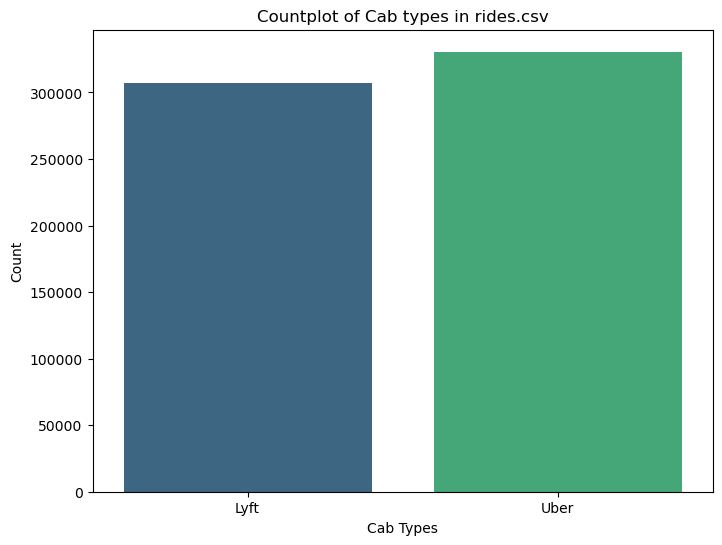

In [13]:
plt.figure(figsize = (8, 6))
sns.countplot(x = 'cab_type', data = rides, palette = 'viridis')
plt.title("Countplot of Cab types in rides.csv")
plt.xlabel("Cab Types")
plt.ylabel("Count")
plt.show()

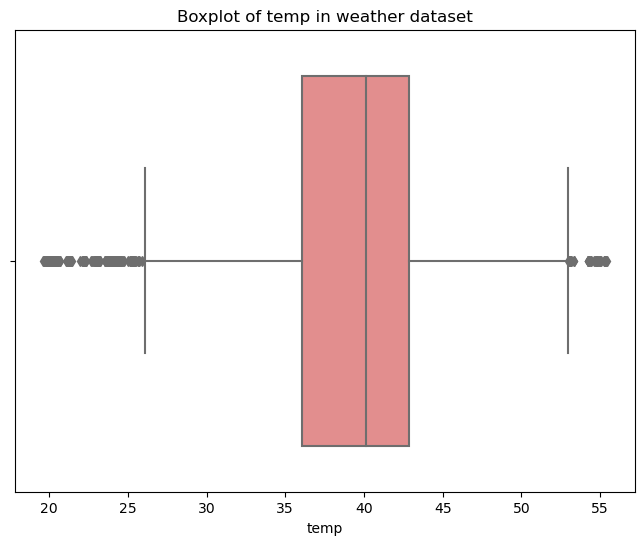

In [14]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = 'temp', data = weather, color = 'lightcoral')
plt.title("Boxplot of temp in weather dataset")
plt.xlabel("temp")
plt.show()

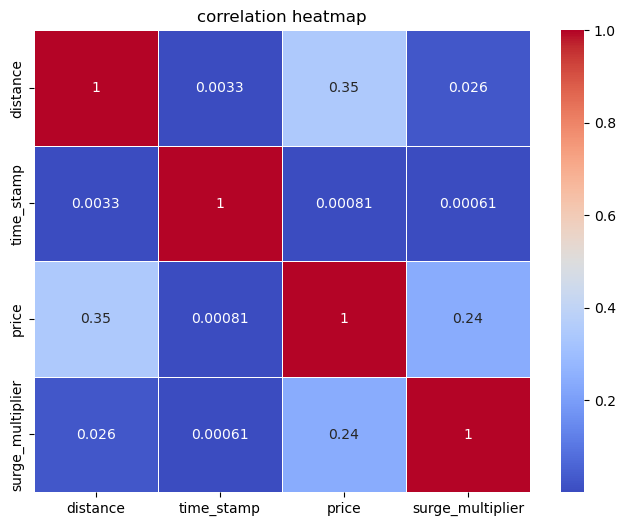

In [15]:
numeric_col = rides.select_dtypes(include = ['float64', 'int64'])

rides_corr = numeric_col.corr()
plt.figure(figsize = (8, 6))
sns.heatmap(rides_corr, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title("correlation heatmap")
plt.show()

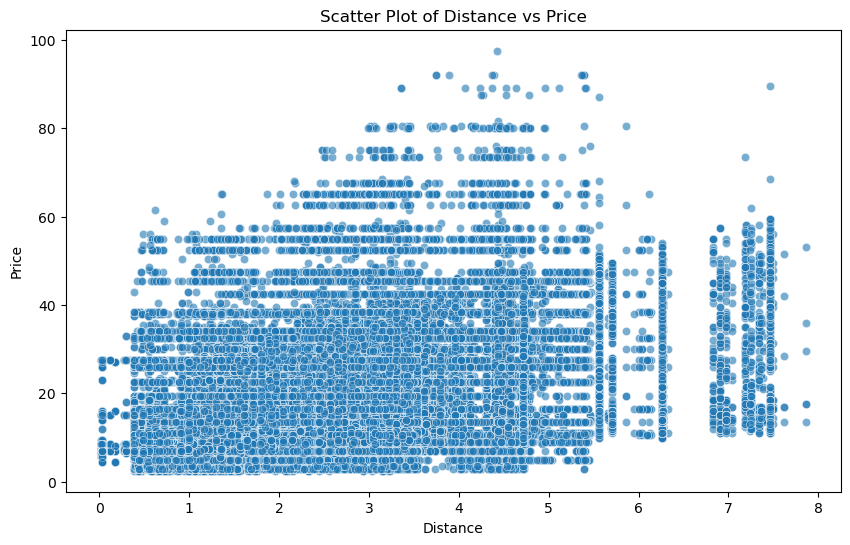

In [16]:
# distance and price
plt.figure(figsize = (10, 6))
sns.scatterplot(x='distance', y='price', data=rides, alpha=0.6)
plt.title('Scatter Plot of Distance vs Price')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()

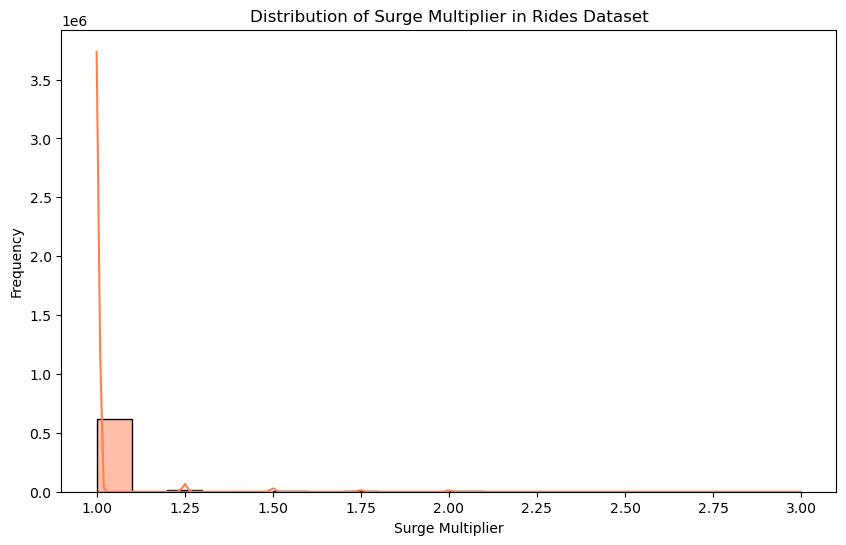

In [17]:
# Histogram of 'surge_multiplier'
plt.figure(figsize=(10, 6))
sns.histplot(rides['surge_multiplier'], bins=20, kde=True, color='coral')
plt.title('Distribution of Surge Multiplier in Rides Dataset')
plt.xlabel('Surge Multiplier')
plt.ylabel('Frequency')
plt.show()


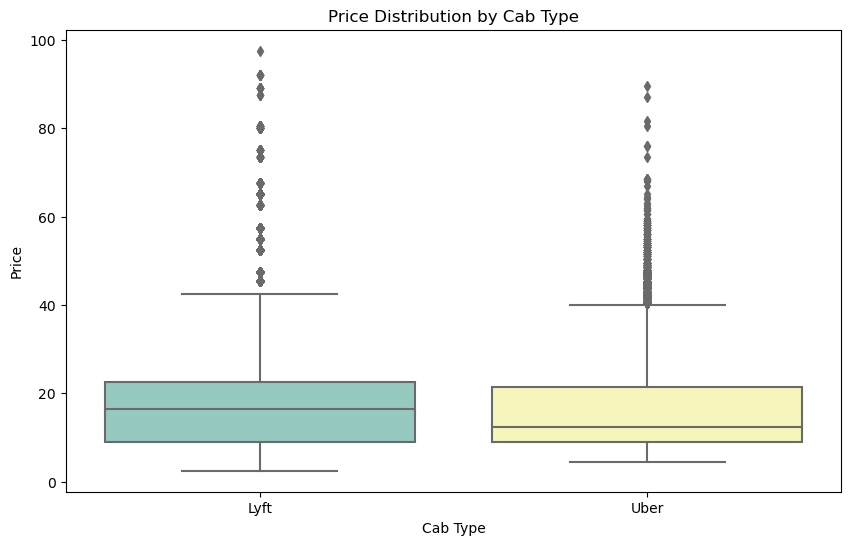

In [18]:
# Boxplot of 'price' by 'cab_type'
plt.figure(figsize=(10, 6))
sns.boxplot(x='cab_type', y='price', data=rides, palette='Set3')
plt.title('Price Distribution by Cab Type')
plt.xlabel('Cab Type')
plt.ylabel('Price')
plt.show()


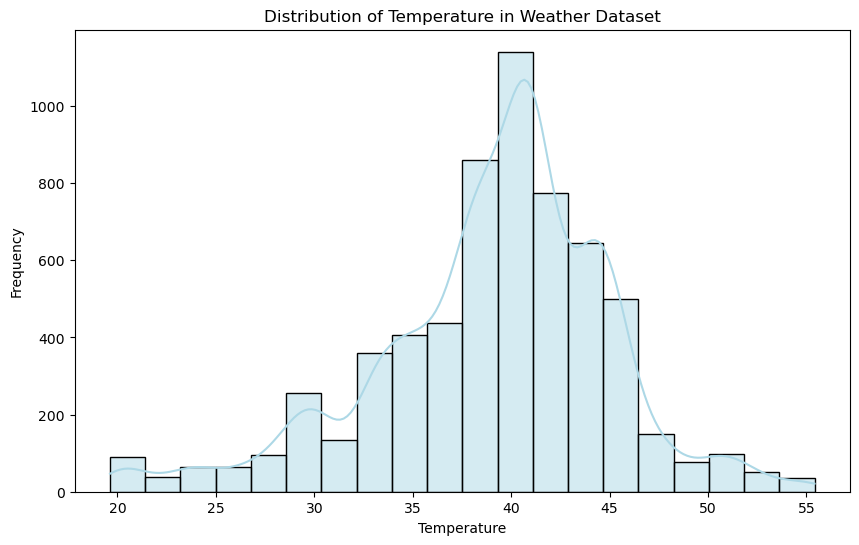

In [19]:
# Histogram of 'temp' in weather dataset
plt.figure(figsize=(10, 6))
sns.histplot(weather['temp'], bins=20, kde=True, color='lightblue')
plt.title('Distribution of Temperature in Weather Dataset')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


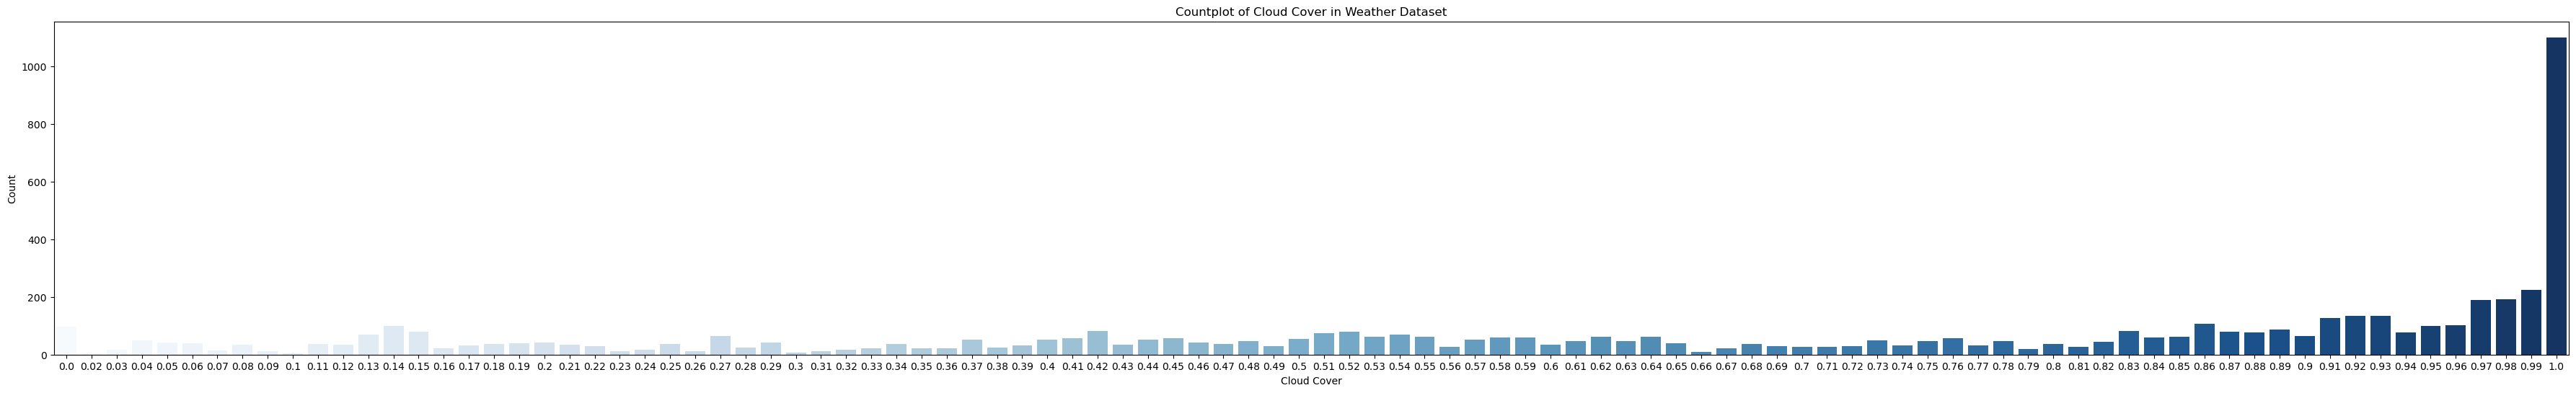

In [20]:
# Countplot of 'clouds'
plt.figure(figsize=(45, 6))
sns.countplot(x='clouds', data=weather, palette='Blues')
plt.title('Countplot of Cloud Cover in Weather Dataset')
plt.xlabel('Cloud Cover')
plt.ylabel('Count')
plt.show()
